# Select a sample using different designs

In [10]:
# devtools::install_github("sdaza/sampler")
library(sampler)
library(data.table)

## Get sample sizes for proportions

- **e** = moe
- **p** = proportion
- **N** = population size
- **rr** = response rate
- **deff** = design effect
- **cl** = confidence

In [11]:
ssize(e=0.04, p=0.5)

[1] 600

In [12]:
ssize(e=0.04, p=0.5, N=2000)

[1] 462

In [13]:
ssize(e=0.04, p=0.5, N=2000, rr=0.80)

[1] 577

In [14]:
ssize(e=0.04, p=0.5, deff=1.3)

[1] 780

In [15]:
# tiny proportion
ssize(e=0.01, p=0.05)

[1] 1825

In [16]:
# relative error
0.01/0.05

[1] 0.2

## MOE estimation

In [17]:
serr(600, p=0.5)

[1] 0.04

In [18]:
serr(600, p=0.5, N=2000)

[1] 0.0335

# Stratification, always safe!

In [19]:
a = rnorm(13000, mean=4.1, sd=0.1)
b = rnorm(1500, mean=8.3, sd=0.8)
c = rnorm(7500, mean=1.7, sd=0.5)
d = rnorm(1500, mean=5.9, sd=0.2)

In [34]:
values = c(a, b, c, d)
labels = c(rep("a", length(a)), rep("b", length(b)), rep("c", length(c)), rep("d", length(d)))
dt = data.table(id=1:length(values), labels, values)
dt[, pop_strat := .N, by=labels]

total_population = nrow(dt)
print(total_population)

[1] 23500


In [23]:
sample_size = 100
nsamples = 1000


f = sample_size/total_population

print(paste0('sample fraction: ', round(f, 3)))

samples = list()
estimates = NULL
for (i in 1:nsamples) {
    samples[[i]] = dt[,.SD[sample(.N, min(sample_size, .N))]]
    estimates = c(estimates, mean(samples[[i]]$values))
}

srs = list('estimates'=estimates, 'samples'=samples)
summary(srs$estimates)
print(paste0('Standard error from sampling distribution: ', round(sd(srs$estimates), 3)))

[1] "sample fraction: 0.004"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.171   3.606   3.718   3.718   3.837   4.272 

[1] "Standard error from sampling distribution: 0.173"


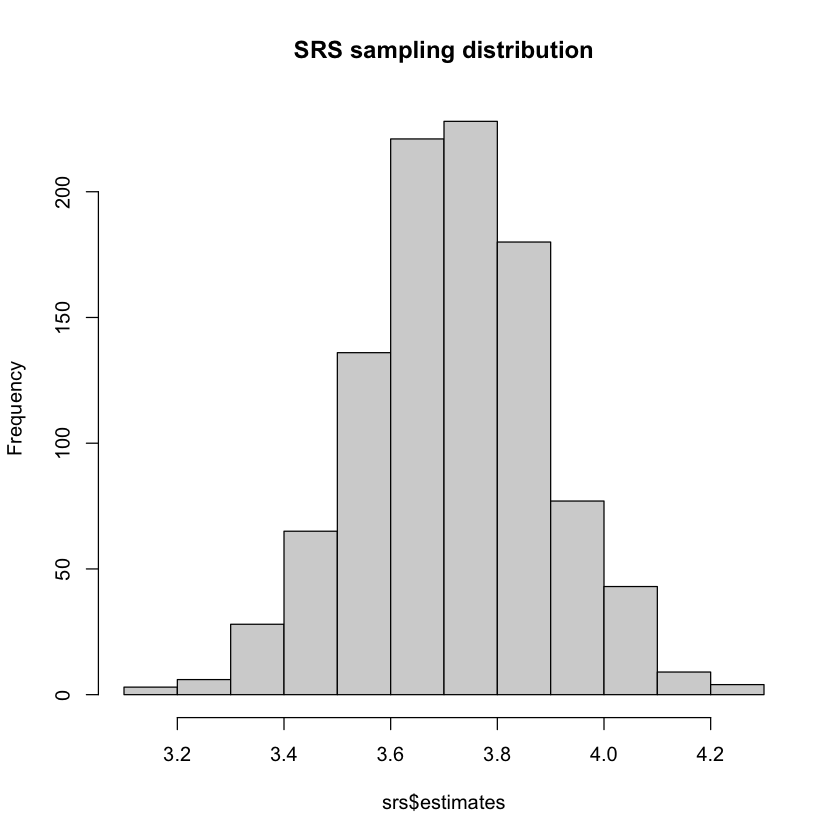

In [24]:
hist(srs$estimates, main='SRS sampling distribution')

In [25]:
# proportional allocation

dt[, samplesize := round(pop_strat * f), labels]

samples = list()
estimates = NULL
for (i in 1:nsamples) {
    samples[[i]] = dt[,.SD[sample(.N, min(samplesize, .N))], by = labels]
    estimates = c(estimates, mean(samples[[i]]$values))
}

str = list('estimates'=estimates, 'samples'=samples)
summary(str$estimates)
print(paste0('Standard error from sampling distribution: ', round(sd(str$estimates), 3)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.556   3.668   3.691   3.691   3.715   3.791 

[1] "Standard error from sampling distribution: 0.036"


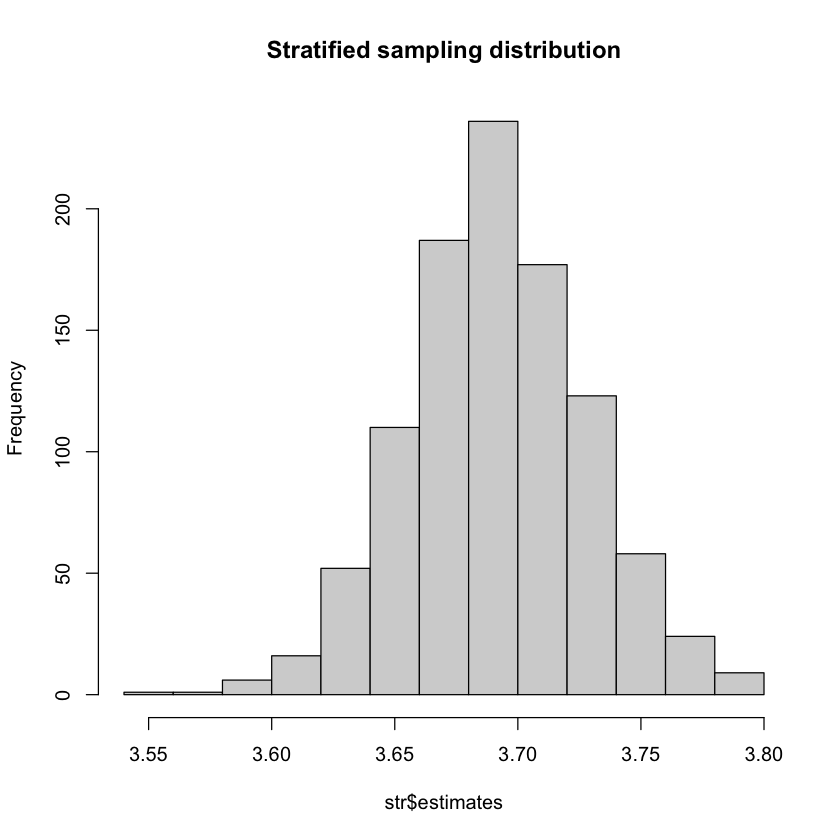

In [26]:
hist(str$estimates, main='Stratified sampling distribution')

In [27]:
prop.table(table(dt$labels))


         a          b          c          d 
0.55319149 0.06382979 0.31914894 0.06382979 

In [28]:
prop.table(table(str$samples[[5]]$labels))


         a          b          c          d 
0.55555556 0.06060606 0.32323232 0.06060606 

In [29]:
prop.table(table(srs$samples[[5]]$labels))


   a    b    c    d 
0.59 0.04 0.26 0.11 

In [30]:
var(str$estimates)/var(srs$estimates)

[1] 0.04358017

# If the sample size is the same (equal allocation)

In [31]:
samples = list()
estimates = NULL
for (i in 1:nsamples) {
    samples[[i]] = dt[,.SD[sample(.N, min(25, .N))], by = labels]
    estimates = c(estimates, mean(samples[[i]]$values))
}

str = list('estimates'=estimates, 'samples'=samples)
summary(str$estimates)
print(paste0('Standard error from sampling distribution: ', round(sd(str$estimates), 3)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.845   4.980   5.016   5.014   5.046   5.189 

[1] "Standard error from sampling distribution: 0.049"


In [32]:
prop.table(table(str$samples[[1]]$labels))


   a    b    c    d 
0.25 0.25 0.25 0.25 

In [33]:
var(str$estimates)/var(srs$estimates)

[1] 0.07929352

# Systematic sampling

In [22]:
rvest = 3
k = 340/39

diff = NULL
units = 3

for (i in 2:38) {
    v = round(units[length(units)] + k)
    diff = c(diff, v - units[length(units)])
    units = c(units, v)
}

In [23]:
print(k)
head(units)
tail(units)

[1] 8.717949


[1]  3 12 21 30 39 48

[1] 291 300 309 318 327 336

In [24]:
mean(diff)

[1] 9